In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor


In [2]:
df = pd.read_csv("AMZN_1997-05-15_2025-02-21.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6986 entries, 0 to 6985
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       6986 non-null   object 
 1   open       6986 non-null   float64
 2   high       6986 non-null   float64
 3   low        6986 non-null   float64
 4   close      6986 non-null   float64
 5   adj_close  6986 non-null   float64
 6   volume     6986 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 382.2+ KB


In [4]:
df.isnull().sum()

date         0
open         0
high         0
low          0
close        0
adj_close    0
volume       0
dtype: int64

In [5]:
df.columns.to_list()

['date', 'open', 'high', 'low', 'close', 'adj_close', 'volume']

In [6]:
target_column = "close"

X = df.drop(columns=[target_column,"date"])
y = df[target_column]

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

X_train.shape , X_test.shape , y_train.shape ,y_test.shape

((5588, 5), (1398, 5), (5588,), (1398,))

In [7]:
lin_model = LinearRegression()
lin_model.fit(X_train,y_train)

LinearRegression()

In [8]:
y_line_pred = lin_model.predict(X_test)

In [9]:
r2_lin = r2_score(y_test,y_line_pred)
mse_lin = mean_squared_error(y_test,y_line_pred)
mar_lin = mean_absolute_error(y_test,y_line_pred)

print(f'R-Squared : {r2_lin}')
print(f'Mean-Squared-Error : {mse_lin}')
print(f'Mean-Absolute-Error : {mar_lin}')


R-Squared : 1.0
Mean-Squared-Error : 1.0615148615522732e-20
Mean-Absolute-Error : 5.926186427215584e-11


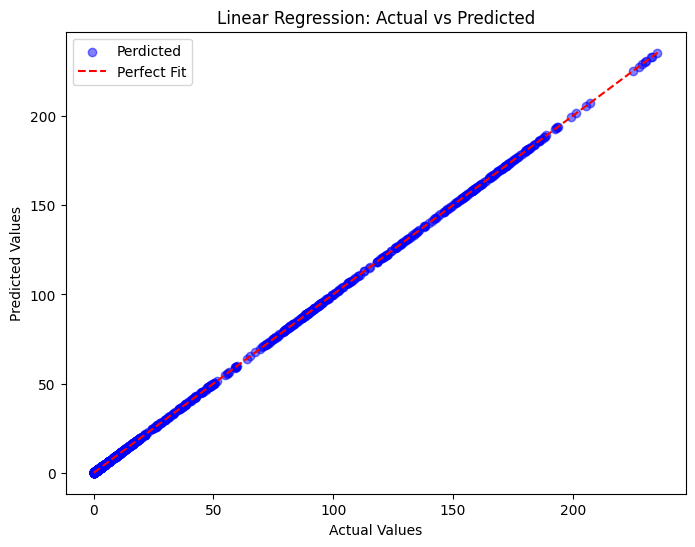

In [10]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_line_pred, color="blue", alpha=0.5 , label="Perdicted")
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()], color="red", linestyle = "--", label="Perfect Fit")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression: Actual vs Predicted")
plt.legend()
plt.show()

In [11]:
degree = 2
ploy_mod = make_pipeline(PolynomialFeatures(degree),LinearRegression())
ploy_mod.fit(X_train,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [12]:
y_poly_pred = ploy_mod.predict(X_test)

In [17]:
r2_poly = r2_score(y_test,y_poly_pred)
mse_poly = mean_squared_error(y_test,y_poly_pred)
mae_poly = mean_absolute_error(y_test,y_poly_pred)


print(f"Polynomial Regression : R^2:{r2_poly:.3f}, Mean Squared Error : {mse_poly:.3f}, Mean Absolute Error : {mae_poly:.3f}")

Polynomial Regression : R^2:0.810, Mean Squared Error : 614.993, Mean Absolute Error : 15.751


In [24]:
knn_model = KNeighborsRegressor(n_neighbors=2)
knn_model.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=2)

In [25]:
y_knn_pred = knn_model.predict(X_test)

In [28]:
r2_knn = r2_score(y_test,y_knn_pred)
mae_knn = mean_absolute_error(y_test,y_knn_pred)

print(f"R2 Score : {r2_knn:.3f}, Mean Absolute error : {mae_knn:.3f}")

R2 Score : 0.006, Mean Absolute error : 37.279
